In [1]:
import pandas as pd
from pathlib import Path
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
from ezekial import yahooprophet as yfp

# %matplotlib inline

In [2]:
ticker_file_path = Path('data/S&P500 tickers.csv')
ticker_df = pd.read_csv(ticker_file_path)
prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()

prophet_ticker_list[0]

'AAPL'

In [25]:
# for ticker in prophet_ticker_list:
#     print(ticker)

In [29]:
#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 2018
# for x in range(len(prophet_ticker_list)):
#     print(x)
    # try:
    #     if x == 0:
    #         df = yf.Ticker(prophet_ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])    
    #     else:
    #         df1 = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])
    #         df = pd.concat([df, df1], axis=1)
    # except: print("yfinance api public ip calls reached daily limit.\nConsider using torify command &/or Alpha Vantage API")

In [32]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.50591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2536.5      0.115226        853.03      0.6175           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          2576    0.00351013       662.846           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2591.02    0.00270002       108.544           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       2595.22   4.94668e-05       137.705   3.209e-07       0.001      481  LS failed, Hessian reset 
     399       2595.84    0.00472075       267.626           1           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     481       2602.71   0.000101616    

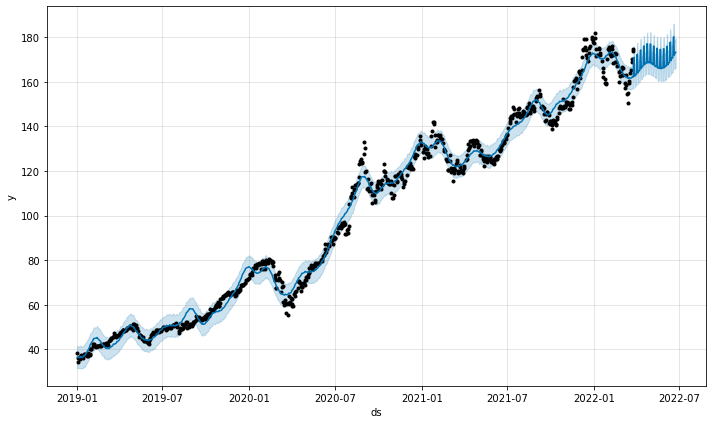

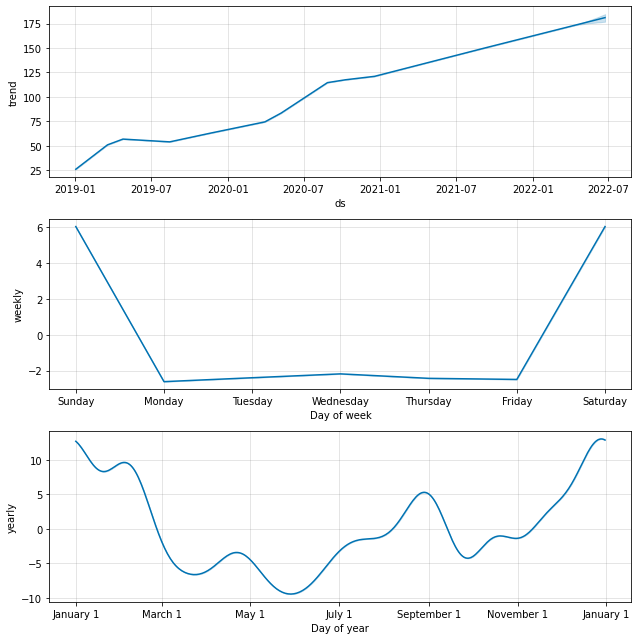

In [40]:
prophet_plot = yfp_obj.plot()

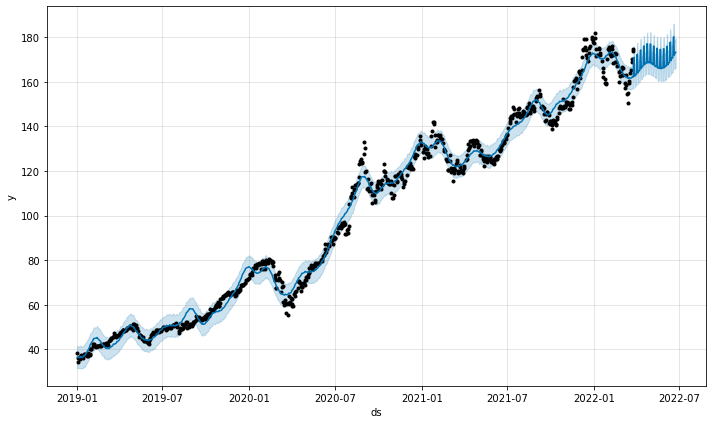

In [71]:
prophet_plot

# Byte Encoding Matplotlib Figure to byte string and decoding it

## Server Side (Put in Function in Ezekial Itself):
Look for more effecient method to rather than saving prior to converting to byte string.

In [82]:
# Have to convert from matplotlib figure to .png
forecast_img_path = Path('images/forecast_temp/forecast.png')
prophet_plot.savefig(forecast_img_path)

In [83]:
# Create the converted image to string
import base64

with open(forecast_img_path, "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
# print(converted_string)
# print(converted_string.decode('utf-8'))

# Save converted string to .bin file
# USE POST METHOD ON THE API INSTEAD
forecast_img_path = Path('images/forecast_temp/encoded.bin')
with open(forecast_img_path, "wb") as file:
    file.write(converted_string)

## Client Side (app side)

In [86]:
import base64
# USE API CALL HERE FIRST 
# MAY NEED TO SAVE FIRST FOR READING IN BINARY MODE & SETTING AS A VAR
forecast_img_path = Path('images/forecast_temp/encoded.bin')
file = open(forecast_img_path, 'rb')
byte = file.read()
file.close()
# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode((byte)))
decodeit.close()

In [ ]:
#load decoded image into Kivy

## Checking Ezekial Method

In [3]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Successfully saved AAPL image.


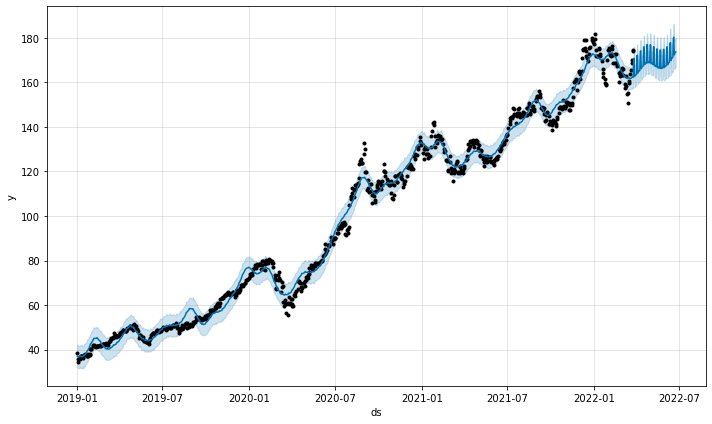

In [4]:
yfp_obj.encode_plot()

In [5]:
yfp_obj.decode_plot()
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

In [6]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 

# Make Function to Use Ezekial for the Entire Ticker List and Upload Images with POST to Django Server